In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
df= sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [22]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# import data in features
X= df[['age','fare']]
X.age.fillna(value=X['age'].mean() ,inplace=True)

# scaler data
scaler= StandardScaler()
X_scaled= scaler.fit_transform(X)

# perform clustrin
model= KMeans(n_clusters=5)
model.fit(X_scaled)

# assign cluster labels to the data
df['cluster']= model.labels_

C:\Users\Shahbaz\AppData\Local\Temp\ipykernel_1736\3781163300.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [23]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,cluster
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,3
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,1
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,1


In [24]:
df['cluster'].unique()

array([3, 0, 1, 4, 2])

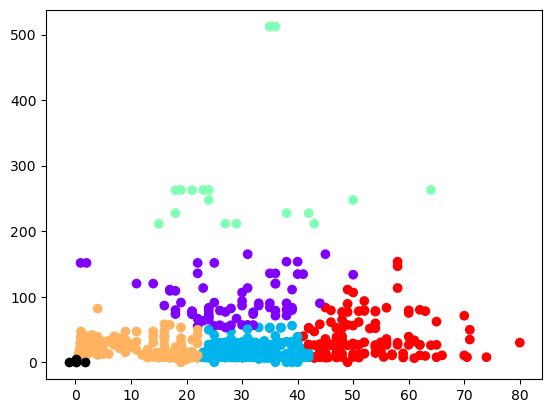

In [25]:
plt.scatter(df['age'],df['fare'],c=df['cluster'],cmap='rainbow')  # cmap is a color
plt.scatter(model.cluster_centers_[: ,0],model.cluster_centers_[:, 1],color='black')

In [26]:
# 2d plot
import plotly.express as px
fig= px.scatter(df,x='age',y='fare',color='cluster')
fig.show()

In [27]:
# # 3d plot
# import plotly.express as px
# fig= px.scatter_3d(df,x='age',y='fare',z='pclass',color='cluster')
# fig.show()

In [28]:
## very high graph. it stop the computer
# fig=px.parallel_coordinates(df,color='cluster',) ### last comma remove
# fig.show()

## How to save ML model

In [29]:
# save the model
import joblib
joblib.dump(model,'22-23-24_K-Mean-clustering.joblib')

['22-23-24_K-Mean-clustering.joblib']

In [40]:
# load the model
model_loaded= joblib.load('22-23-24_K-Mean-clustering.joblib')
model_loaded

KMeans(n_clusters=5)

## tips data( aother model)

In [31]:
import seaborn as sns

df_1= sns.load_dataset("tips")
df_1

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [32]:
df_1.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [33]:
df_1.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [34]:
# change catagorical colmun( yes,no=1,0) in numberic form
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

le.fit(df_1['smoker'])

df_1['smoker'] = le.transform(df_1['smoker'])

# ## OR
# import pandas as pd
# X= pd.get_dummies(X,columns=['smoker'])
# X= pd.get_dummies(X,columns=['day'])
# X= pd.get_dummies(X,columns=['time'])

In [35]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

le.fit(df_1['day'])

df_1['day'] = le.transform(df_1['day'])

In [36]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

le.fit(df_1['time'])

df_1['time'] = le.transform(df_1['time'])

In [37]:
X= df_1.drop(columns=['sex'])
y= df_1['sex']

In [38]:
df_1.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,0,2,0,2
1,10.34,1.66,Male,0,2,0,3
2,21.01,3.50,Male,0,2,0,3
3,23.68,3.31,Male,0,2,0,2
4,24.59,3.61,Female,0,2,0,4


In [39]:
from sklearn.tree import DecisionTreeClassifier

model1= DecisionTreeClassifier()
model1= model1.fit(X,y)